## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exploration.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.


In [1]:
# 1. import  Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine

In [2]:
#2. Create engine
engine = create_engine('sqlite:///Resources/Hawaii.sqlite')

In [3]:
#3. Declare a Base using `automap_base()`
Base = automap_base()

#4. Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [4]:
#5.Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
#6. Create class
Measurement = Base.classes.measurement
Station = Base.classes.station


In [6]:
# 7. Create a Session Object to Connect to DB
session = Session(bind=engine)

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [7]:
#1. IMPORT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [8]:
#2. QUERY MOST RECENT 12 MONTHS OF PRECIPITATION DATA
precipitation = (session
                 .query(Measurement.date, Measurement.prcp)
                 .filter(Measurement.date> "2016-08-23")
                 .all())

In [9]:
#3.LOAD INTO A DATAFRAME 
df_precipitation = pd.DataFrame(precipitation)
df_precipitation.date = pd.to_datetime(df_precipitation.date)
df_precipitation.set_index("date", inplace = True)
print(df_precipitation.head())
df_precipitation.tail()

            prcp
date            
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
2016-08-28  0.01


,prcp
date,
2017-08-17,0.13
2017-08-19,0.09
2017-08-21,0.56
2017-08-22,0.50
2017-08-23,0.45


Text(0.5,1,'Precipitation over the last year')

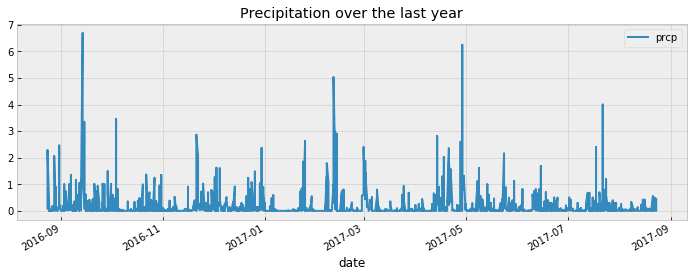

In [10]:
df_precipitation.plot(figsize = (12,4))
plt.title("Precipitation over the last year")

In [11]:
df_precipitation.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000



### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.


In [12]:
#1. QUERY TO CALCULATE THE TOTAL # OF STATIONS
session.query(Station.index).count()

9

In [13]:
#2. QUERY TO FIND THE MOST ACTIVE STATIONS
weather = (session
           .query(Measurement.station, Measurement.prcp, Measurement.tobs, Measurement.index)
           .group_by(Measurement.station)
           .order_by(Measurement.index.desc())
           .all())

weather = pd.DataFrame(weather)
weather

,station,prcp,tobs,index
0,USC00516128,0.45,76.0,19549
1,USC00511918,0.00,64.0,16937
2,USC00519281,0.06,79.0,14958
3,USC00519523,0.08,82.0,12186
4,USC00518838,0.00,74.0,9508
5,USC00517948,0.01,80.0,9005
6,USC00514830,0.00,82.0,7634
7,USC00513117,0.00,77.0,5432
8,USC00519397,0.00,81.0,2723


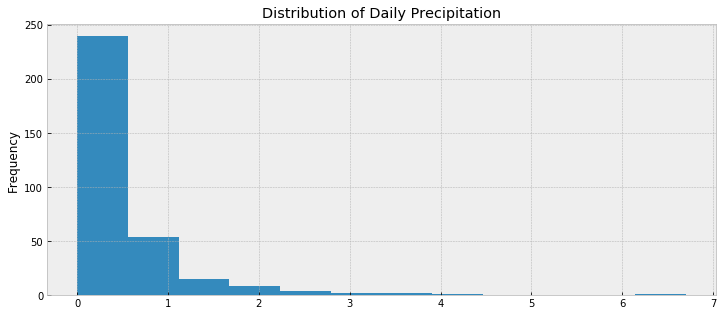

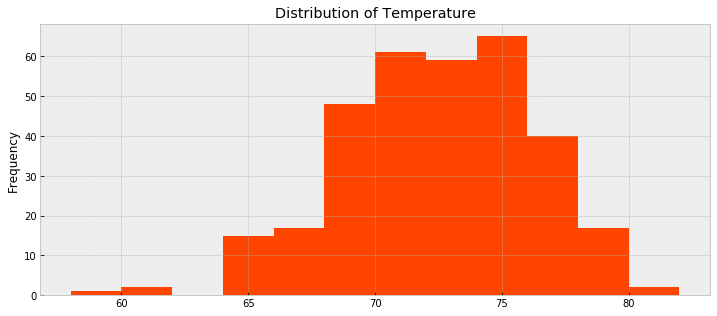

In [14]:
#3. RETRIEVE LAST 12 MONTHS OF DATA FOR STATION WITH HIGHEST # OF OBSERVATIONS

weather = (session
           .query(Measurement.date, Measurement.tobs, Measurement.prcp)
           .filter(Measurement.date> "2016-08-23")
           .filter(Measurement.station == "USC00516128")
           .all())

weather = pd.DataFrame(weather)
weather.set_index("date", inplace = True)
weather.head()

#PLOT THE RESULTS AS A HISTOGRAM WITH bins=12.
weather.prcp.plot.hist(figsize=(12, 5), bins = 12, title = "Distribution of Daily Precipitation")
plt.show()
weather.tobs.plot.hist(figsize=(12, 5), bins = 12, title = "Distribution of Temperature", color = 'orangered')




### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).


In [15]:
#1. WRITE A FUNCTION THAT ACCEPTS START AND END DATE AND CALCULATES AND PLOTS
# NOTE: decided to use box plot instead since it provides more information about the distribution of temperature
#       Also embeded the production of the plot into the function

def calc_temps(start, end):
    weather = (session
               .query(Measurement.date, Measurement.tobs)
               .filter(Measurement.date> start)
               .filter(Measurement.date <= end)
               .filter(Measurement.station == "USC00516128")
               .all())

    weather = pd.DataFrame(weather)
    weather.set_index("date", inplace = True)
    weather.tobs.plot.box(figsize=(8, 4))
    plt.title(f'Temperature Distributionf from {start} to {end}')
    plt.ylabel('Temperature (F)')
    plt.show()
    print(weather.describe())


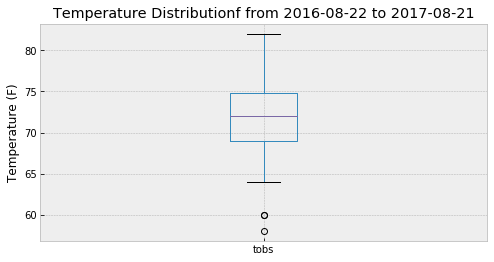

             tobs
count  326.000000
mean    71.987730
std      3.754772
min     58.000000
25%     69.000000
50%     72.000000
75%     74.750000
max     82.000000


In [16]:
#2. USE THE FUNCTION TO CALCULATE THE TEMPERATURE RANGE AND DISTRIBUTION
calc_temps("2016-08-22", "2017-08-21")